In [1]:
import pandas


dataset_cities = pandas.read_csv('../data/01-03-21.csv')
dataset_cities.drop('Unnamed: 0', axis=1, inplace=True)
dataset_cities

,id_news,country,media_outlet,url,title,text,date
0,21917526.0,chile,radiosago,https://www.radiosago.cl/rio-bueno-bajo-hoy-el...,Río Bueno bajó hoy el número de contagios,La Seremía de Salud de Los Ríos confirmó este ...,2021-03-01
1,21917541.0,chile,radiosago,https://www.radiosago.cl/hijo-de-conocido-come...,Hijo de conocido comerciante de Futrono fallec...,El hijo de un conocido comerciante de Futrono ...,2021-03-01
2,21917617.0,chile,radiosago,https://www.radiosago.cl/colegio-de-profesores...,Colegio de Profesores Los Lagos: «No están las...,"A través de una declaración pública, el Coleg...",2021-03-02
3,21917632.0,chile,radiosago,https://www.radiosago.cl/diputado-alejandro-sa...,Diputado Alejandro Santana solicitó habilitar ...,El parlamentario por Chiloé hizo un llamado a...,2021-03-03
4,21916993.0,chile,radiosago,https://www.radiosago.cl/candidato-a-gobernado...,Candidato a gobernador por Los Lagos Ricardo K...,Será la comisión mixta el próximo paso del pro...,2021-03-06
...,...,...,...,...,...,...,...
2465,22409493.0,chile,elllanquihue,https://www.ellanquihue.cl/impresa/2021/03/15/...,Padres de niño que padece extraña enfermedad p...,Ignacio Pérez nació en 2014. Según cuenta su p...,2021-03-15
2466,47508207.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,MUNICIPIO DE,"Muchos años debieron pasar, en los cuales se r...",2021-03-12
2467,47508269.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,"Camino al Óscar: nominan a ""El agente topo"" a ...",Nick Jonas y Priyanka Chopra fueron los encarg...,2021-03-16
2468,47507883.0,chile,elllanquihue,https://www.ellanquihue.cl/impresa/2021/03/23/...,Vacuna de AstraZeneca es 79% efectiva contra e...,La vacuna desarrollada por la Universidad de O...,2021-03-23


In [2]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("es_core_news_md")
matcher = Matcher(nlp.vocab)

In [3]:
from spacy.matcher import PhraseMatcher

In [4]:
cities = ["Quellón"]

In [5]:
for city in cities:
    dataset_cities.insert(7,city.replace(" ","_"),0)

In [6]:
matcher_cities = PhraseMatcher(nlp.vocab)

for city in cities:
    matcher_cities.add(city, [nlp(city)])

In [7]:
for index, row in dataset_cities.iterrows():
    print(index)
    txt = row["text"]

    try:

        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span
            dataset_cities.at[index, span.text.replace(" ", "_")] = 1
    except Exception as e:
        print(e)
        pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
[E866] Expected a string or 'Doc' as input, but got: <class 'float'>.
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259


1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963


In [8]:
###Noticias que hablan de Quellon

dataset_Quellon=dataset_cities.loc[dataset_cities['Quellón'] == 1]
dataset_Quellon=dataset_Quellon.iloc[:, 0:7]


In [9]:
dataset_Quellon

,id_news,country,media_outlet,url,title,text,date
148,21916743.0,chile,radiosago,https://www.radiosago.cl/fiestas-en-chiloe-20-...,Fiestas en Chiloé: 20 detenidos en medio de tr...,Nuevas fiestas clandestinas en Chiloé arrojaro...,2021-03-29
152,21916803.0,chile,radiosago,https://www.radiosago.cl/encuentran-cadaver-de...,Encuentran cadáver de hombre en un centro de c...,El cuerpo sin vida de un hombre fue hallado es...,2021-03-26
163,21916930.0,chile,radiosago,https://www.radiosago.cl/salmonchile-dona-equi...,Salmonchile dona equipamiento al hospital de Q...,En medio de la emergencia sanitaria provocada...,2021-03-21
174,21917023.0,chile,radiosago,https://www.radiosago.cl/aprueban-165-millones...,Aprueban 165 millones para apoyar la alimentac...,Se trata del proyecto “Entrega de servicios de...,2021-03-19
203,21430252.0,chile,elheraldoaustral,https://www.eha.cl/noticia/regional/cuatro-com...,Cuatro comunas cambian de Fase en el Plan Paso...,"El seremi de Salud, Alejandro Caroca, anunció ...",2021-03-23
...,...,...,...,...,...,...,...
2427,22328730.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,denuncia y ayuda,recintos de vacunación cierran por restricción...,2021-03-28
2434,22378598.0,chile,elaustral,https://www.australosorno.cl/impresa/2021/03/2...,Covid: baja el uso de las residencias mientras...,Un 53% de ocupación registran las cuatro resid...,2021-03-22
2446,22412809.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,denuncia y ayuda,avanza proyecto habitacional en chonchi.- En s...,2021-03-12
2451,22412960.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,Más de 56 mil isleños ya han recibido al menos...,Mientras al cierre Chile llevaba 5.475.578 de ...,2021-03-20


In [10]:
from tqdm import tqdm # Barra de progreso
import transformers
transformers.__version__


'4.18.0'

In [11]:
model_name = "finiteautomata/beto-sentiment-analysis"

from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

from transformers import pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [12]:
dataset_Quellon['title_label'] = ""
dataset_Quellon['title_score'] = ""

for index, row in tqdm(dataset_Quellon.iterrows(), desc='Análisis de sentimiento', total=dataset_Quellon.shape[0]):

    # Analizamos su sentimiento en inglés
    sentiment_value = nlp(row['title'])

    # Insertamos en dataframe
    dataset_Quellon.at[index, "title_label"] = sentiment_value[0].get('label')
    dataset_Quellon.at[index, "title_score"] = sentiment_value[0].get('score')

Análisis de sentimiento: 100%|████████████████| 137/137 [00:07<00:00, 17.63it/s]


In [13]:
dataset_Quellon

,id_news,country,media_outlet,url,title,text,date,title_label,title_score
148,21916743.0,chile,radiosago,https://www.radiosago.cl/fiestas-en-chiloe-20-...,Fiestas en Chiloé: 20 detenidos en medio de tr...,Nuevas fiestas clandestinas en Chiloé arrojaro...,2021-03-29,NEG,0.919487
152,21916803.0,chile,radiosago,https://www.radiosago.cl/encuentran-cadaver-de...,Encuentran cadáver de hombre en un centro de c...,El cuerpo sin vida de un hombre fue hallado es...,2021-03-26,NEG,0.993404
163,21916930.0,chile,radiosago,https://www.radiosago.cl/salmonchile-dona-equi...,Salmonchile dona equipamiento al hospital de Q...,En medio de la emergencia sanitaria provocada...,2021-03-21,NEU,0.997347
174,21917023.0,chile,radiosago,https://www.radiosago.cl/aprueban-165-millones...,Aprueban 165 millones para apoyar la alimentac...,Se trata del proyecto “Entrega de servicios de...,2021-03-19,NEU,0.995629
203,21430252.0,chile,elheraldoaustral,https://www.eha.cl/noticia/regional/cuatro-com...,Cuatro comunas cambian de Fase en el Plan Paso...,"El seremi de Salud, Alejandro Caroca, anunció ...",2021-03-23,NEU,0.995627
...,...,...,...,...,...,...,...,...,...
2427,22328730.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,denuncia y ayuda,recintos de vacunación cierran por restricción...,2021-03-28,NEU,0.996011
2434,22378598.0,chile,elaustral,https://www.australosorno.cl/impresa/2021/03/2...,Covid: baja el uso de las residencias mientras...,Un 53% de ocupación registran las cuatro resid...,2021-03-22,NEG,0.960593
2446,22412809.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,denuncia y ayuda,avanza proyecto habitacional en chonchi.- En s...,2021-03-12,NEU,0.996011
2451,22412960.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,Más de 56 mil isleños ya han recibido al menos...,Mientras al cierre Chile llevaba 5.475.578 de ...,2021-03-20,NEU,0.995668


In [14]:
dataset_Quellon.reset_index(drop='True',inplace=True)

In [15]:
dataset_Quellon

,id_news,country,media_outlet,url,title,text,date,title_label,title_score
0,21916743.0,chile,radiosago,https://www.radiosago.cl/fiestas-en-chiloe-20-...,Fiestas en Chiloé: 20 detenidos en medio de tr...,Nuevas fiestas clandestinas en Chiloé arrojaro...,2021-03-29,NEG,0.919487
1,21916803.0,chile,radiosago,https://www.radiosago.cl/encuentran-cadaver-de...,Encuentran cadáver de hombre en un centro de c...,El cuerpo sin vida de un hombre fue hallado es...,2021-03-26,NEG,0.993404
2,21916930.0,chile,radiosago,https://www.radiosago.cl/salmonchile-dona-equi...,Salmonchile dona equipamiento al hospital de Q...,En medio de la emergencia sanitaria provocada...,2021-03-21,NEU,0.997347
3,21917023.0,chile,radiosago,https://www.radiosago.cl/aprueban-165-millones...,Aprueban 165 millones para apoyar la alimentac...,Se trata del proyecto “Entrega de servicios de...,2021-03-19,NEU,0.995629
4,21430252.0,chile,elheraldoaustral,https://www.eha.cl/noticia/regional/cuatro-com...,Cuatro comunas cambian de Fase en el Plan Paso...,"El seremi de Salud, Alejandro Caroca, anunció ...",2021-03-23,NEU,0.995627
...,...,...,...,...,...,...,...,...,...
132,22328730.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,denuncia y ayuda,recintos de vacunación cierran por restricción...,2021-03-28,NEU,0.996011
133,22378598.0,chile,elaustral,https://www.australosorno.cl/impresa/2021/03/2...,Covid: baja el uso de las residencias mientras...,Un 53% de ocupación registran las cuatro resid...,2021-03-22,NEG,0.960593
134,22412809.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,denuncia y ayuda,avanza proyecto habitacional en chonchi.- En s...,2021-03-12,NEU,0.996011
135,22412960.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,Más de 56 mil isleños ya han recibido al menos...,Mientras al cierre Chile llevaba 5.475.578 de ...,2021-03-20,NEU,0.995668


In [16]:
#dataset_Quellon.to_csv('dataset_Quellon.csv')

In [17]:
dataset_negativas_Quellon = dataset_Quellon.loc[dataset_Quellon['title_label'] == 'NEG']

In [18]:
dataset_positivas_Quellon = dataset_Quellon.loc[dataset_Quellon['title_label'] == 'POS']

In [19]:
dataset_neutras_Quellon = dataset_Quellon.loc[dataset_Quellon['title_label'] == 'NEU']

In [20]:
dataset_negativas_Quellon.reset_index(drop=True,inplace=True)
dataset_positivas_Quellon.reset_index(drop=True,inplace=True)
dataset_neutras_Quellon.reset_index(drop=True,inplace=True)

In [23]:
#nombre_archivo="dataset_neutras_Quellon"
dataset_neutras_Quellon.to_csv('dataset_negativas_Quellon.csv')

In [21]:
dataset_Quellon.shape[0]

137

In [22]:
dataset_negativas_Quellon.shape[0]

44

In [23]:
dataset_positivas_Quellon.shape[0]

4

In [24]:
dataset_neutras_Quellon.shape[0]

89

In [ ]:
##Analisis sentimiento noticias negativas

In [24]:
noticias_negativas = dataset_negativas_Quellon.text.values.tolist()
noticias_positivas = dataset_positivas_Quellon.text.values.tolist()

In [25]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load('es_core_news_md')

In [26]:
matcher = Matcher(nlp.vocab)

In [27]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

/home/fernando/miniconda3/envs/tal/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [28]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

In [29]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

In [30]:
noticias_procesadas_negativas = []


for index, noticia in enumerate(noticias_negativas):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas_negativas.append(noticia_procesada)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [31]:
noticias_procesadas_positivas = []


for index, noticia in enumerate(noticias_positivas):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas_positivas.append(noticia_procesada)

0
1
2
3


In [32]:
# Create Dictionary
id2word_negativas = corpora.Dictionary(noticias_procesadas_negativas)
id2word_positivas = corpora.Dictionary(noticias_procesadas_positivas)


In [33]:
texts_negativas = noticias_procesadas_negativas
texts_positivas = noticias_procesadas_positivas

In [34]:
dataset_negativas = [id2word_negativas.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas_negativas]
dataset_positivas = [id2word_positivas.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas_positivas]


In [35]:
### NO CAMBIAR ESTA CELDA###

def compute_coherence_values_negativas(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset_negativas,
                                           id2word=id2word_negativas,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [36]:
### NO CAMBIAR ESTA CELDA###

def compute_coherence_values_positivas(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset_positivas,
                                           id2word=id2word_positivas,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [26]:
start=2
limit=15
step=2

In [40]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [27]:
# Can take a long time to run.
model_list_negativas, coherence_values_negativas = compute_coherence_values_negativas(dictionary=id2word_negativas, corpus=dataset_negativas, texts=noticias_procesadas_negativas, start=start, limit=limit, step=step)

NameError: name 'compute_coherence_values_negativas' is not defined

In [25]:

x = range(start, limit, step)
plt.plot(x, coherence_values_negativas)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score negativas")
plt.legend(("coherence_values_negativas"), loc='best')
plt.show()

NameError: name 'limit' is not defined

In [43]:
# Build LDA model
lda_model_negativas = gensim.models.ldamodel.LdaModel(corpus=dataset_negativas,
                                           id2word=id2word_negativas,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [44]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_negativas, dataset_negativas, id2word_negativas)
vis

/home/fernando/miniconda3/envs/tal/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/fernando/miniconda3/envs/tal/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/fernando/miniconda3/envs/tal/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/fernando/miniconda3/envs/tal/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/fer

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.080996 -0.071258       1        1  39.894157
1     -0.109271 -0.027313       2        1  36.817869
0      0.028275  0.098571       3        1  23.287974, topic_info=                      Term       Freq      Total Category  logprob  loglift
648                 fiesta  30.000000  30.000000  Default  30.0000  30.0000
8                  fiestas  21.000000  21.000000  Default  29.0000  29.0000
9     fiestas clandestinas  17.000000  17.000000  Default  28.0000  28.0000
1354            residentes  16.000000  16.000000  Default  27.0000  27.0000
404                comunas  29.000000  29.000000  Default  26.0000  26.0000
...                    ...        ...        ...      ...      ...      ...
40                  comuna   6.222666  54.096338   Topic3  -5.6971  -0.7053
209                  nivel   5.109389  20.904983   Topic3  -5.8942   0.0483
244                trabajo   4.822329  15.413410   Topic3  -5.9521   0.2953
87                  región   5.397503  39.076766   Topic3  -5.8394  -0.5224
142                  camas   4.807284  23.182851   Topic3  -5.9552  -0.1160

[222 rows x 6 columns], token_table=      Topic      Freq                     Term
term                                          
683       3  0.735800                 Análisis
793       1  0.851503          Curaco de Vélez
257       2  0.993092  María Fernanda Matamala
1235      1  0.769160               accidentes
265       2  0.883905                     agua
...     ...       ...                      ...
254       3  0.514593                      vez
906       1  0.855427                    virus
906       2  0.142571                    virus
906       3  0.071286                    virus
503       2  0.882464                viviendas

[300 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [65]:
##para las positivas


# Can take a long time to run.
model_list_positivas, coherence_values_positivas = compute_coherence_values_positivas(dictionary=id2word_positivas, corpus=dataset_positivas, texts=noticias_procesadas_positivas, start=start, limit=limit, step=step)

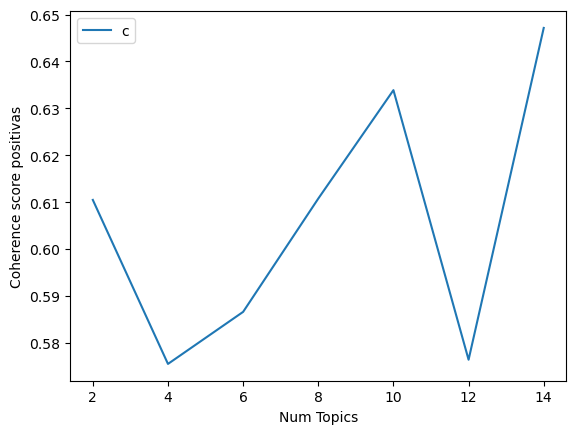

In [66]:

x = range(start, limit, step)
plt.plot(x, coherence_values_positivas)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score positivas")
plt.legend(("coherence_values_positivas"), loc='best')
plt.show()

In [67]:
# Build LDA model
lda_model_positivas = gensim.models.ldamodel.LdaModel(corpus=dataset_positivas,
                                           id2word=id2word_positivas,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [45]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_positivas, dataset_positivas, id2word_positivas)
vis


NameError: name 'lda_model_positivas' is not defined